In [1]:
#importando pacotes
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', None)
from pprint import pprint

#pre processing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE


#modelos e métricas
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, average_precision_score
from sklearn.metrics import make_scorer


#otimizando hiperparametros
from sklearn.model_selection import validation_curve
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import RandomizedSearchCV



In [2]:
#importando a base
df = pd.read_csv("F:/4intelligence/case_2/dados/UCI_Credit_Card.csv")


# Limpeza básica

Nesse passo iremos ter um primeio panorama do dataset: checaremos por dados ausentes, colunas duplicadas e possíveis erros de digitação.

In [3]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.shape


(30000, 25)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.duplicated().sum()


0

In [7]:
df.isnull().sum()


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: >

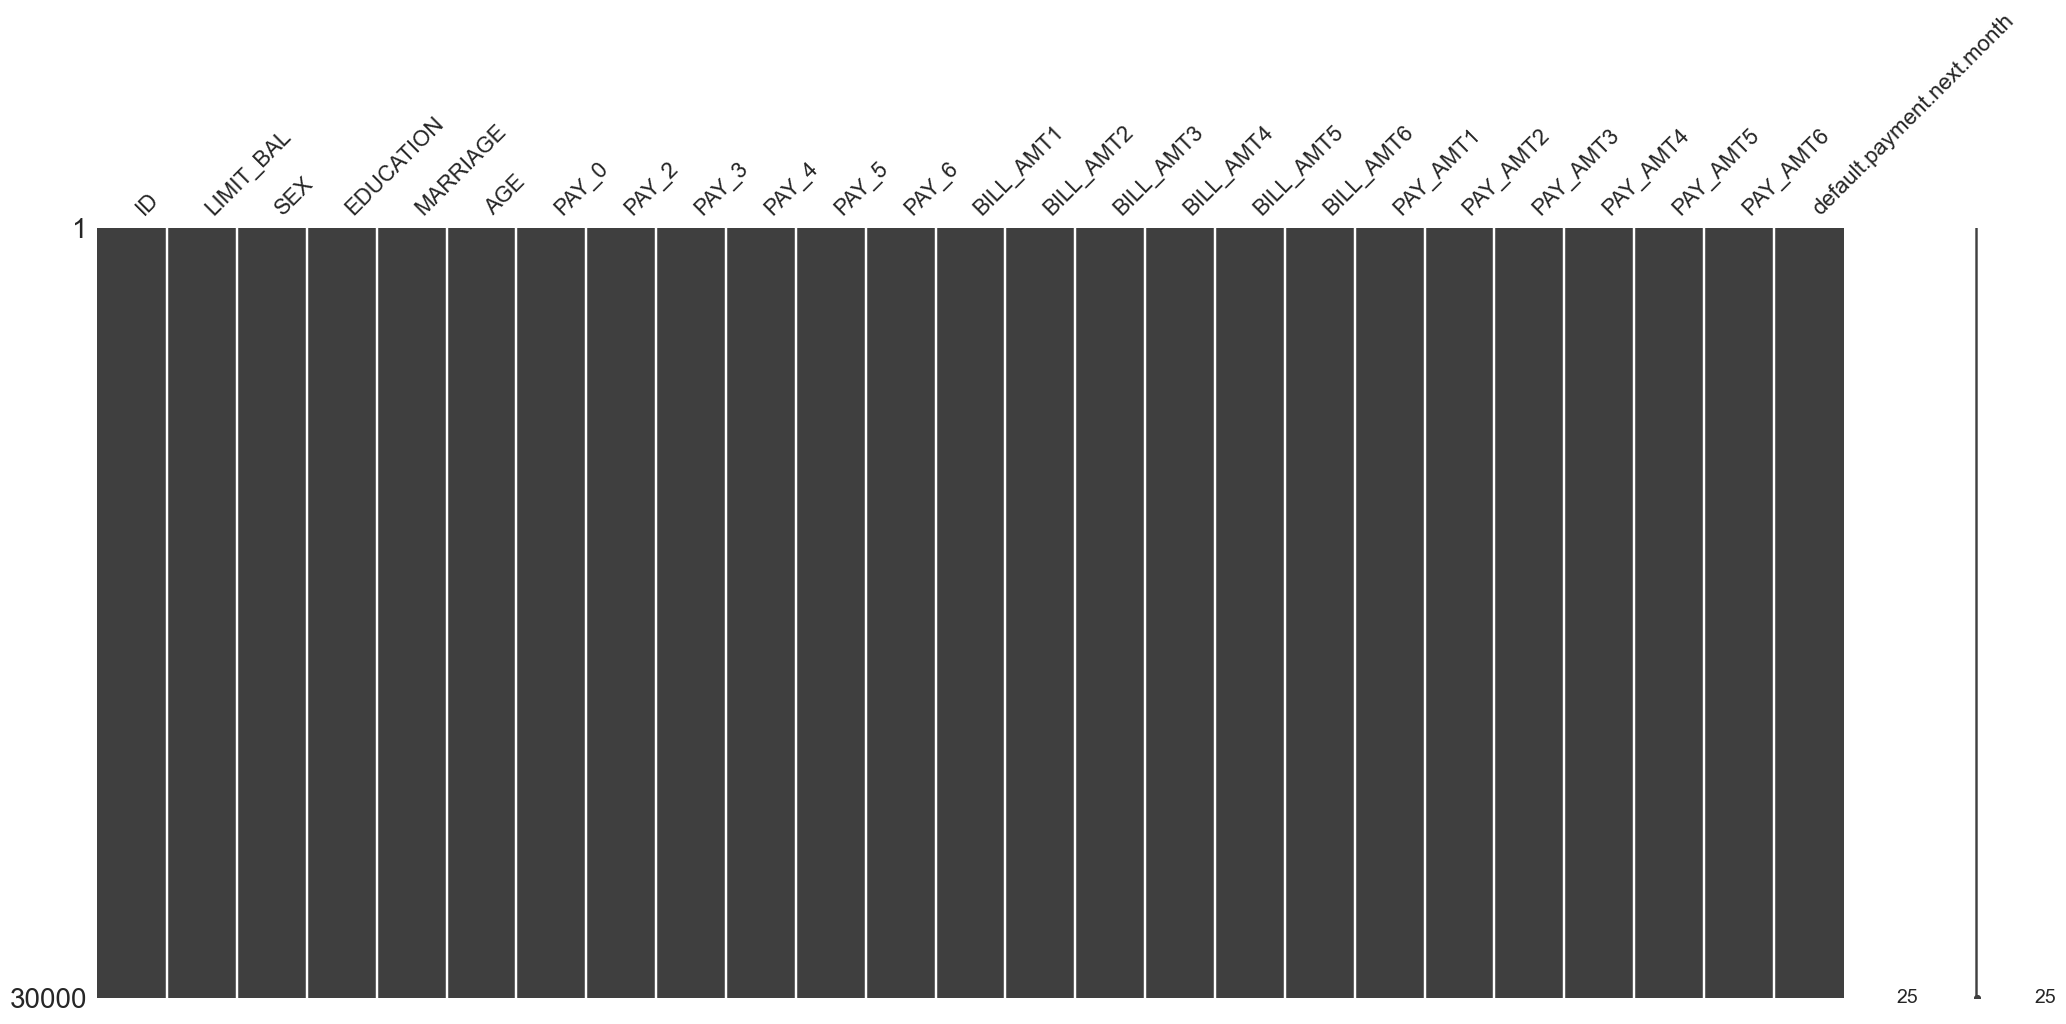

In [8]:
msno.matrix(df)


Em um primeiro momento, não parece haver dados duplicados ou problemas com dados ausentes.


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Pela tabela de descrição, é possível perceber alguns valores estranhos no dataset:

- As variáveis categóricas contém valores não listados no dicionário. `EDUCATION` e `MARRIAGE` tem valores mínimos de 0, entretanto a ordem númerica no dicionário inicia por 1.
- `PAY_0` e variantes também contém mínimo de -2, embora o dicionário inicia-se com -1 e não tenha valores registrados dentro do rótulo -2.
- `BILL_AMT1` e variantes tem valores negativos como mínimo. Isso poderia ser interpretado como dívidas? Não está claro e deve ser investigado.

A coluna `ID` não tem valor explicativo, irei eliminá-la do dataset:


In [10]:
df = df.drop(columns=['ID'])

In [11]:
df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1


# Análise exploratória de dados

Tendo um panorama inicial do dataset nas etapas anteriores, podemos entender melhor como o dataset se comporta ao fazermos um estudo mais detalhado.
Nessa etapa, verificamos através da análise gráfica a distribuição das variáveis categóricas e quantitativas e se há valores discrepantes. Além disso, observammos como nossa variável de interesse [`default.payment.next.month`] se comporta. Faremos uma análise univariada e uma bivariada.

## Outliers

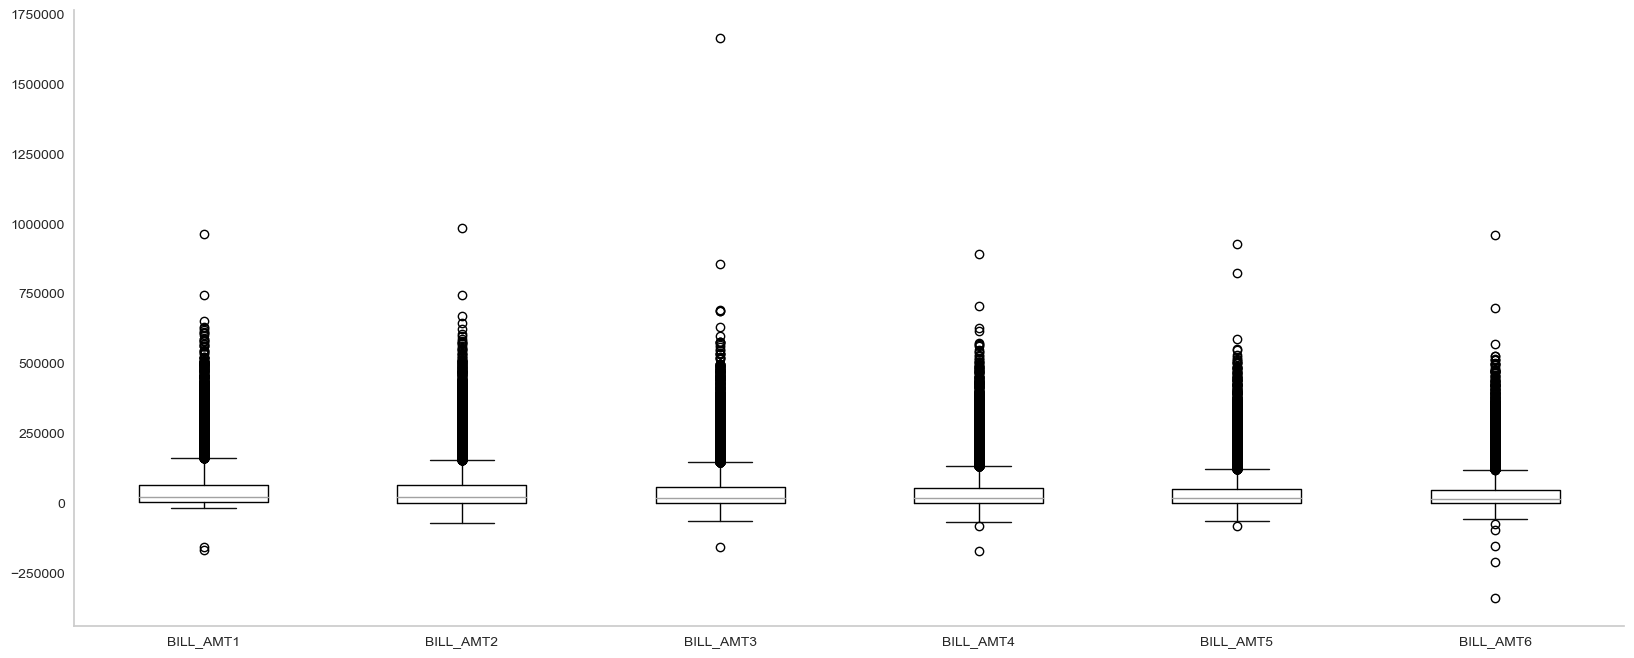

In [12]:
df.boxplot(column=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], grid= False, figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


- Há alguns valores de outliers, principalmente na variável `BILL_AMT3`, onde podemos ver que o valor máximo da distribuição é um outlier.

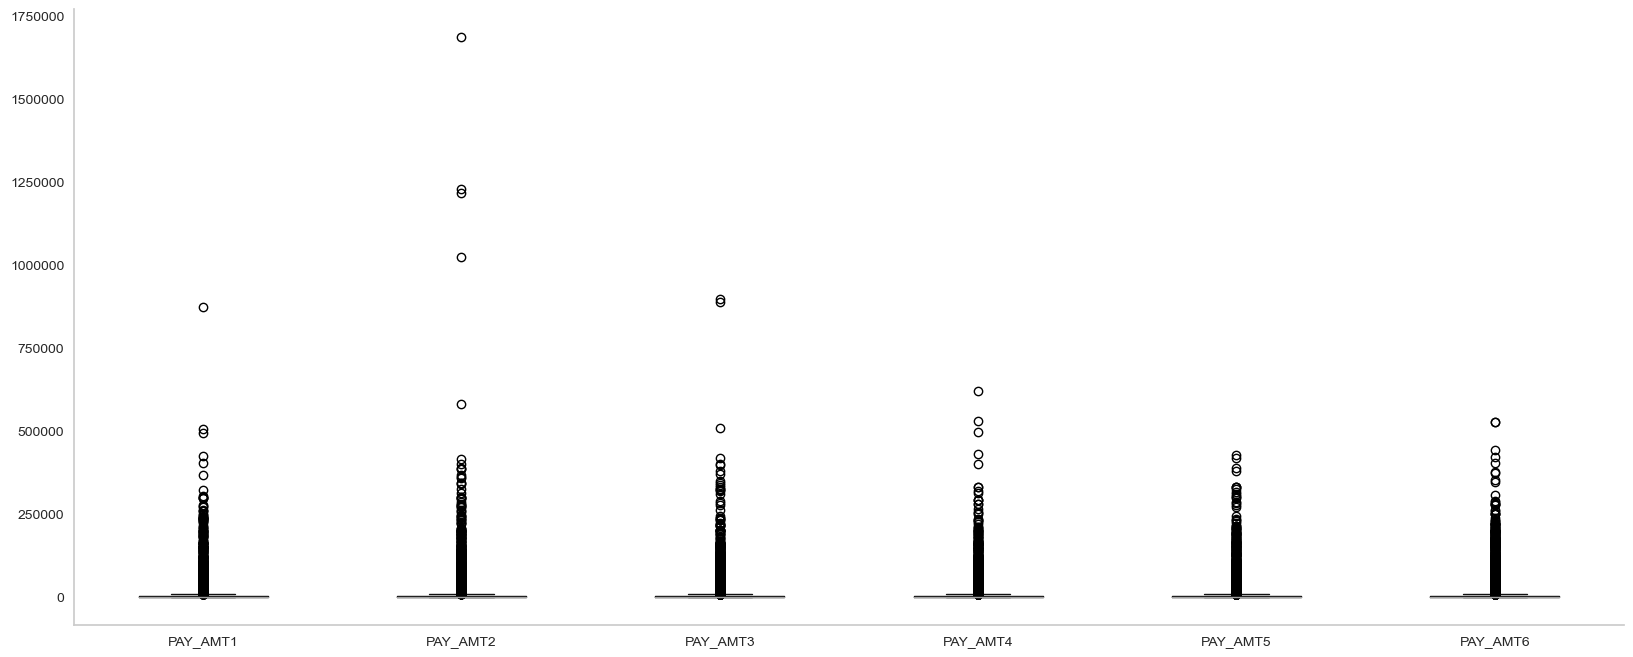

In [13]:
df.boxplot(column=['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], grid= False, figsize=(20,8))
plt.ticklabel_format(style='plain', axis='y')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

- Também há outliers, principalmente quando há valores acima de 750000.

## Variável target: default



In [14]:
# Funções de configuraçãos dos gráficos

def configure_barh_chart(chart, title):
    # Configura o título do gráfico  e bordas
    plt.title(title, size=16, weight='bold', alpha=0.8)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom = False, left = False)

    # Configura os rótulos nas barras 
    if isinstance(chart, plt.Axes):
        rects = chart.patches
        for rect in rects:
            x_value = rect.get_width()
            y_value = rect.get_y() + rect.get_height() / 2
            space = -60
            ha = 'left'
            if x_value < 0:
                space *= -1
                ha = 'right'
            label = "{:.0f}".format(x_value)

            plt.annotate(
                label,
                (x_value, y_value),
                xytext=(space, 0),
                textcoords="offset points",
                va='center',
                ha=ha,
                color='white',
                weight='bold',
                size=14)

    # Exibe o gráfico
    plt.show()


# gráfico barras horizontal
def configure_bar_chart(chart, title, legend=True):
    # Configura o título do gráfico e bordas
    plt.title(title, size=14, alpha=0.8, weight='bold', pad=10)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.tick_params(bottom=False, left=False)
    plt.yticks([])
    
    # Adiciona a legenda se o argumento legend for True
    if legend:
        plt.legend(loc='upper right', frameon=False, fontsize=10)

    # Configura rótulos nas barras
    if isinstance(chart, plt.Axes):
        for rect in chart.patches:
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2

            space = 1.5
            va = 'bottom'

            if y_value < 0:
                space *= 1
                va = 'top'

            label = "{:.0f}".format(y_value)
            chart.annotate(
                label,
                (x_value, y_value),
                xytext=(0, space),
                textcoords="offset points",
                ha='center',
                va=va,
                color='black',
                size=12,
                weight='bold')

    # Exibe o gráfico
    plt.show()

#histograma com kde
def plot_histogram_kde(data, title, xlabel, ylabel, color):
    with plt.style.context('ggplot'):
        plt.figure(figsize=(10, 6))
        sns.histplot(data, kde=True, color=color)
        plt.ticklabel_format(style='plain', axis='x')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(False)
        plt.show()


Renomeei a coluna `default.payment.next.month` para `is_default`.

In [15]:
df = df.rename(columns = {'default.payment.next.month': 'is_default'})

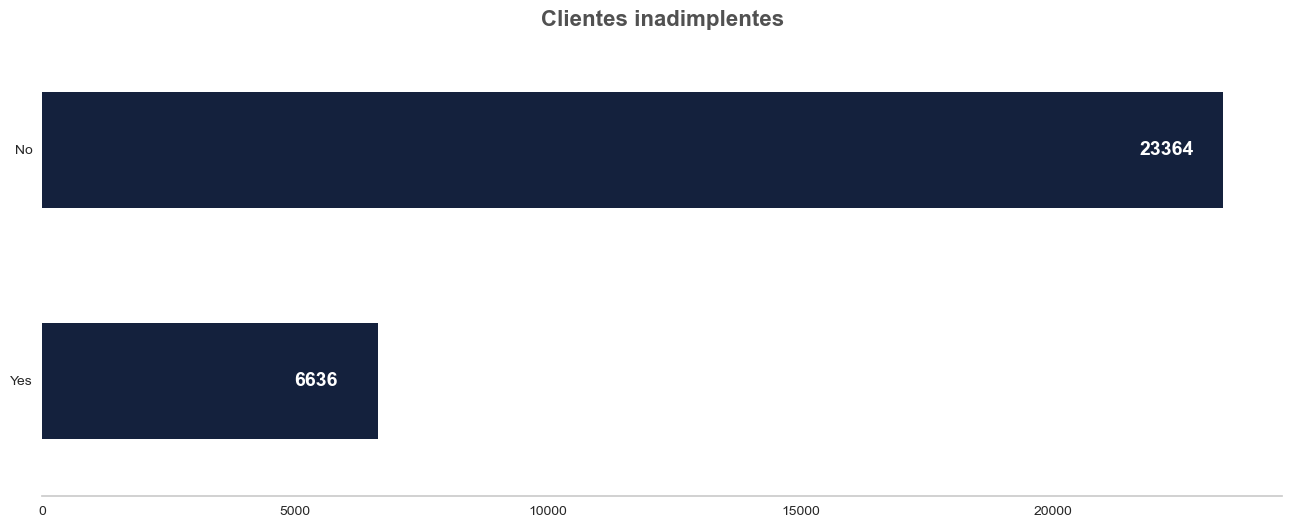

In [16]:
# Mapeia os rótulos desejados para os valores binários
label_mapping_default = {0: 'No', 1: 'Yes'}
#Gráfico
default_grph = (df['is_default'].map(label_mapping_default).value_counts()
                .sort_values(ascending=True)
                .plot(kind='barh', color='#14213d', xlabel='',figsize=(16, 6), align='center',  grid= False))
configure_barh_chart(default_grph, 'Clientes inadimplentes') 


- Há mais clientes que pagaram o cartão de crédito do que aqueles que não, vemos que temos classes desbalanceadas. Será necessário utilizar técnincas de resampling.

In [17]:
print(f'A probabilidade de inadimplência é: {df.is_default.sum() / len(df.is_default)}')


A probabilidade de inadimplência é: 0.2212


## Variáveis categóricas

Vamos olhar a distribuição das variáveis categóricas. Temos como variáveis categóricas 

- SEX
- EDUCATION
- MARRIAGE

In [18]:
#renomeando os títulos para melhor vizualização dos gráficos
df['SEX'] = df['SEX'].replace({1:'Male',2: 'Female'})
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate', 2: 'University', 3: 'High School',  4: 'Other', 5: 'Unknown', 6: 'Unknown'})
df['MARRIAGE'] = df['MARRIAGE'].replace({1: 'Married', 2: 'Single', 3: 'Other'})

In [19]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,is_default
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


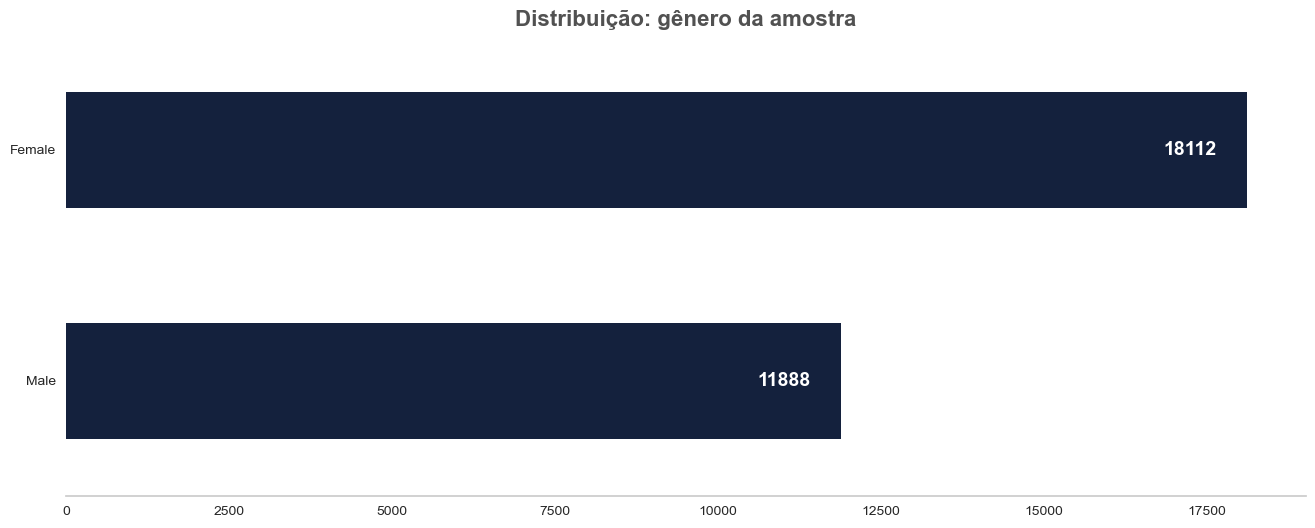

In [20]:
sex_grph = (df['SEX'].value_counts()
                .sort_values(ascending=True)
                .plot(kind='barh', color='#14213d', xlabel='',figsize=(16, 6), align='center',  grid= False))
configure_barh_chart(sex_grph, 'Distribuição: gênero da amostra')

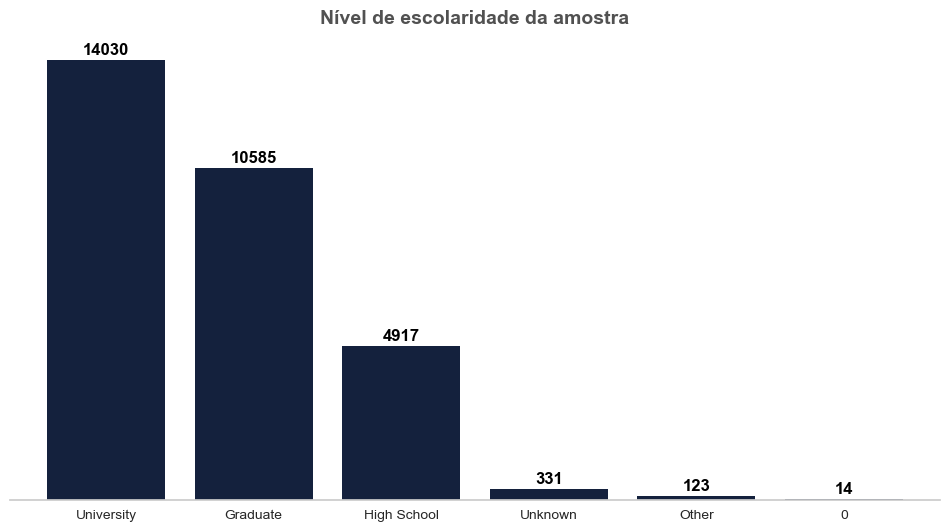

In [21]:
education_gph = (df['EDUCATION'].value_counts()
                                .plot(kind= 'bar', rot= 0, color='#14213d', grid= False, width = 0.8, figsize=(12, 6)))
configure_bar_chart(education_gph,'Nível de escolaridade da amostra', legend = False)



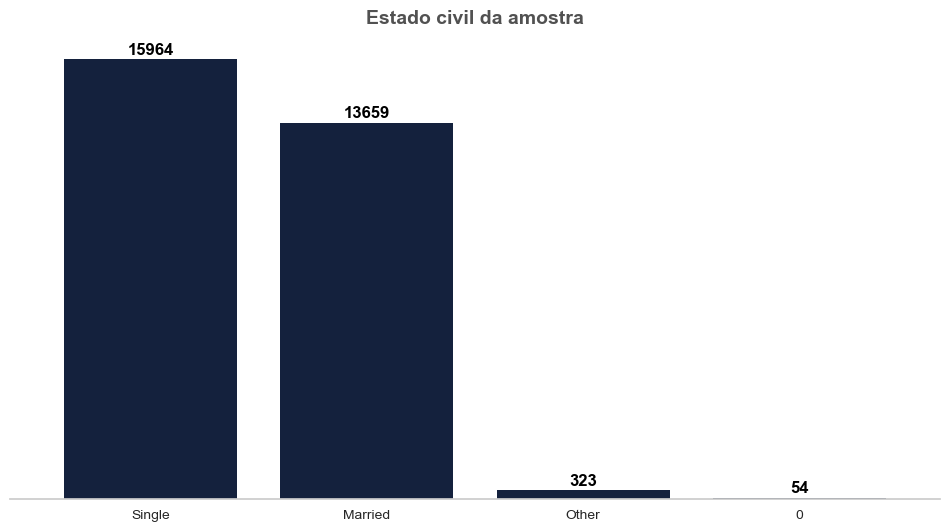

In [22]:
marriage_gph = (df['MARRIAGE'].value_counts()
                                .plot(kind= 'bar', rot= 0, color='#14213d', grid= False, width = 0.8, figsize=(12, 6)))
configure_bar_chart(marriage_gph,'Estado civil da amostra', legend = False)

Temos alguns valores codificados como 0 para corrigir na etapa de pré-processamento dos dados.

Feita a análise da distribuição das variáveis categóricas univariada, fiz a análise bivariada em relação à inadimplência:

In [23]:
# Criando tabelas de contingência
sex_crstab = pd.crosstab(df['SEX'], df['is_default'].map(label_mapping_default))
educ_crstab = pd.crosstab(df['EDUCATION'], df['is_default'].map(label_mapping_default))
marriage_crstab = pd.crosstab(df['MARRIAGE'], df['is_default'].map(label_mapping_default))

print('Gênero crosstab')
print(sex_crstab)
print('-' * 25)
print('Educação crosstab')
print(educ_crstab)
print('-' * 25)
print('Estado Civil crosstab')
print(marriage_crstab)

Gênero crosstab
is_default     No   Yes
SEX                    
Female      14349  3763
Male         9015  2873
-------------------------
Educação crosstab
is_default      No   Yes
EDUCATION               
0               14     0
Graduate      8549  2036
High School   3680  1237
Other          116     7
University   10700  3330
Unknown        305    26
-------------------------
Estado Civil crosstab
is_default     No   Yes
MARRIAGE               
0              49     5
Married     10453  3206
Other         239    84
Single      12623  3341


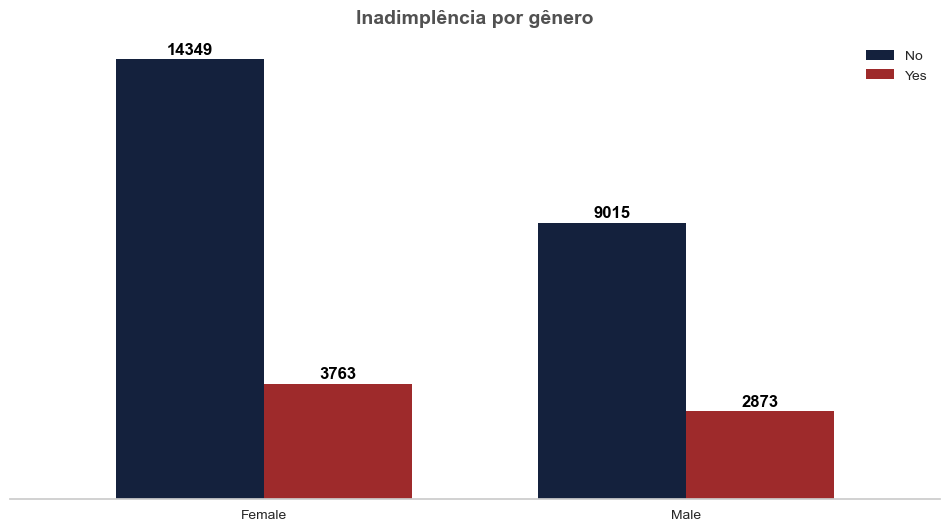

In [24]:
sex_crstab_plt = sex_crstab.plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'],  figsize=(12, 6))
configure_bar_chart(sex_crstab_plt,'Inadimplência por gênero')

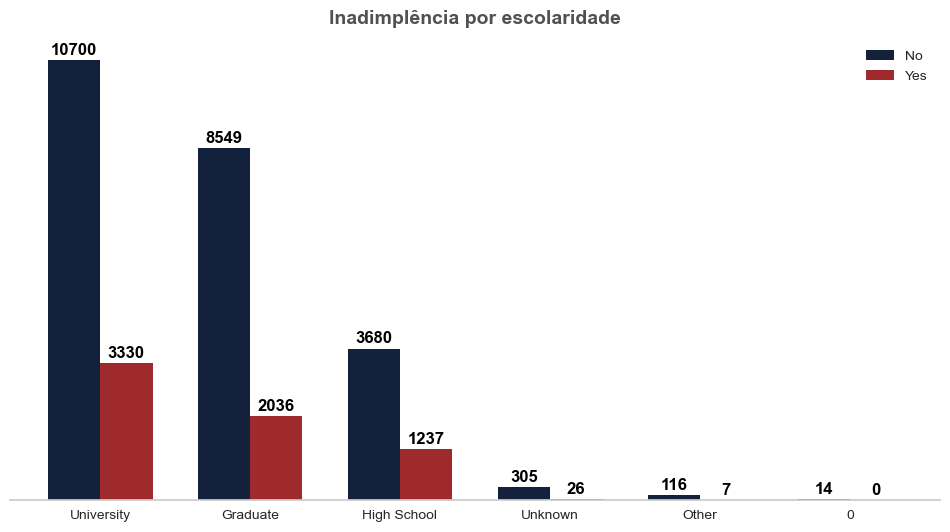

In [25]:
educ_crstab_plt = (educ_crstab.sort_values(['No'], ascending = False)
                              .plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'], figsize=(12, 6)))
configure_bar_chart(educ_crstab_plt,'Inadimplência por escolaridade')


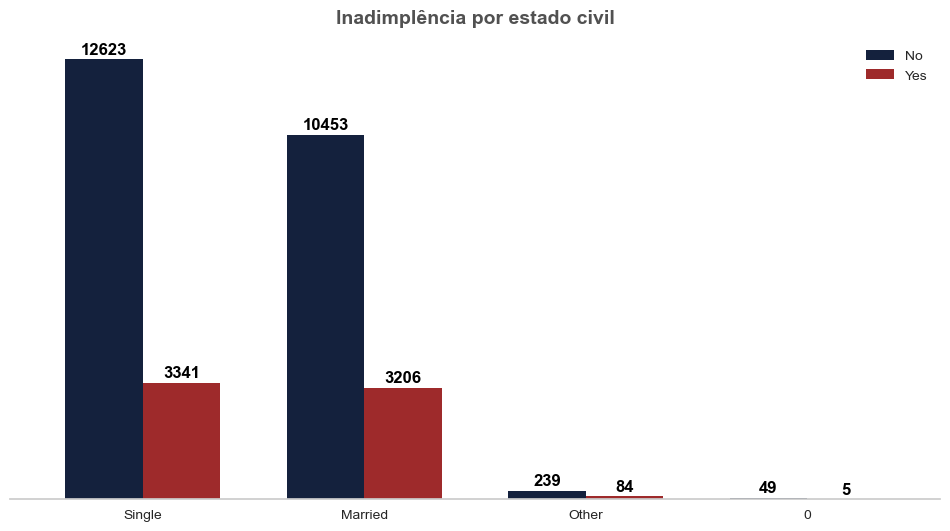

In [26]:
marriage_crstab_plt = (marriage_crstab.sort_values(['No'], ascending = False)
                              .plot(kind='bar', rot = 0, grid=False, width = 0.7, xlabel = '', color = ['#14213d', '#9e2a2b'], figsize=(12, 6)))
configure_bar_chart(marriage_crstab_plt,'Inadimplência por estado civil')

- Os genêros parecem ter níveis similares de inadimplência
- O estado civil também tem nívels similares de inadimplência (há um número de inadimplentes solteiros um pouco maior do que aqueles que são casados).

## Variáveis quantitativas

Vamos observar a distribuição das variáveis quantitativas.

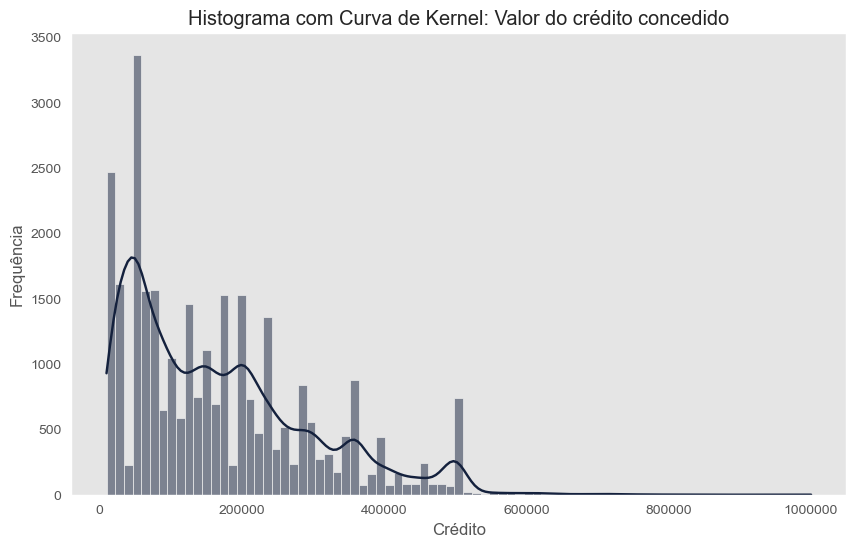

In [27]:
plot_histogram_kde(df['LIMIT_BAL'], 'Histograma com Curva de Kernel: Valor do crédito concedido', 'Crédito', 'Frequência', '#14213d')

A cauda longa sugere alguns outliers, fazendo um boxplot podemos confirmar isso:

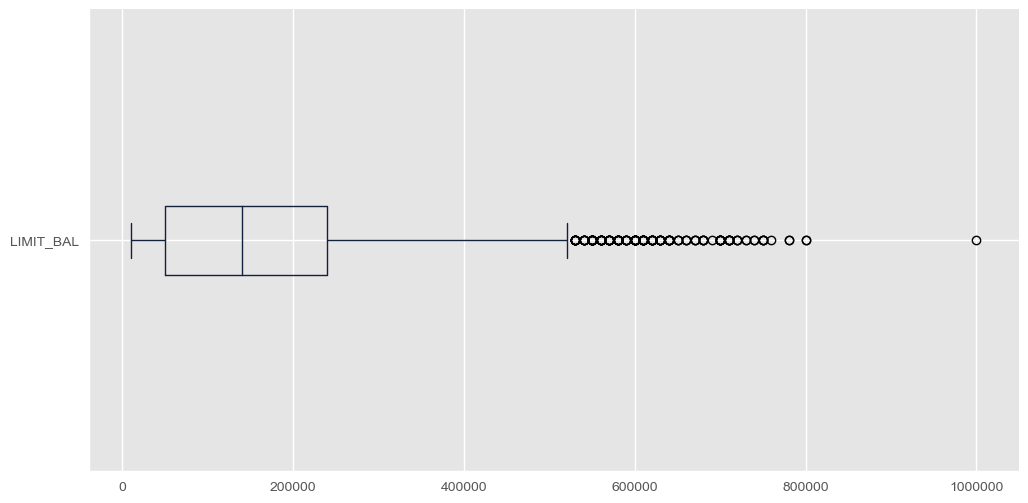

In [28]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    df.boxplot(column=['LIMIT_BAL'], vert=False, color='#14213d')
    ax.ticklabel_format(style='plain', axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()

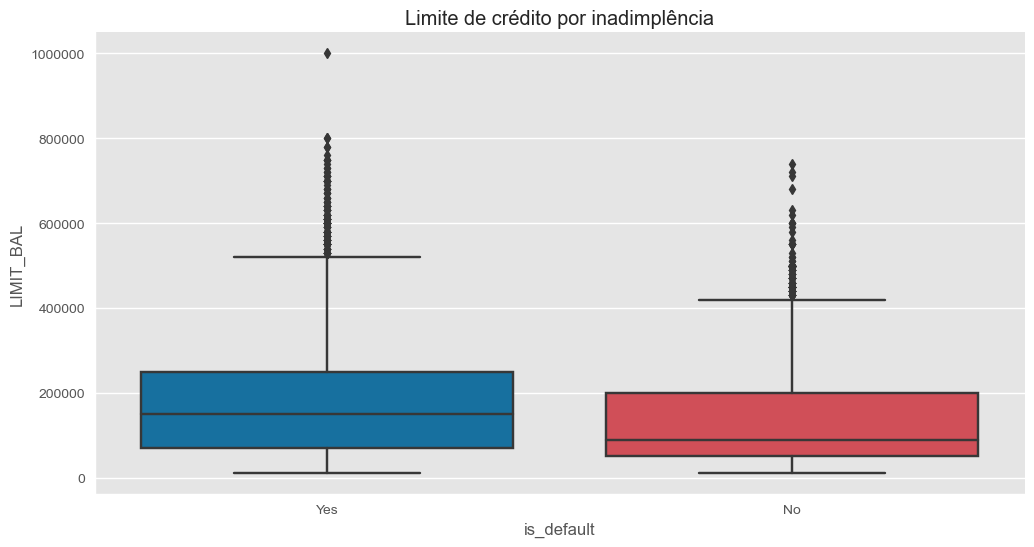

In [29]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='is_default', y='LIMIT_BAL', data=df, palette={0: '#0077b6', 1: '#e63946'})
    
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title('Limite de crédito por inadimplência')
    # Substituir os rótulos do eixo x
    ax.set_xticklabels([label_mapping_default[label] for label in df['is_default'].unique()])

plt.show()

- Pessoas que estão inadimplentes tem maior limite de crédito, em média.

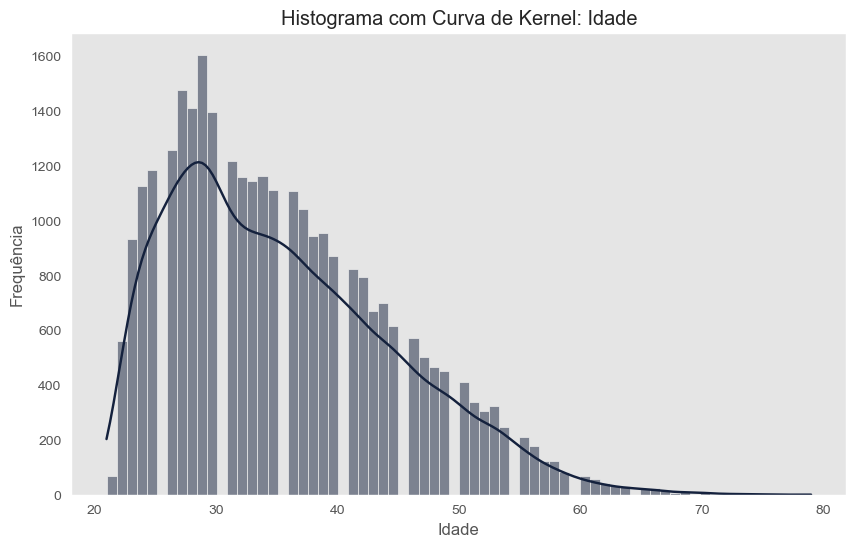

In [30]:
plot_histogram_kde(df['AGE'], 'Histograma com Curva de Kernel: Idade', 'Idade', 'Frequência', '#14213d')

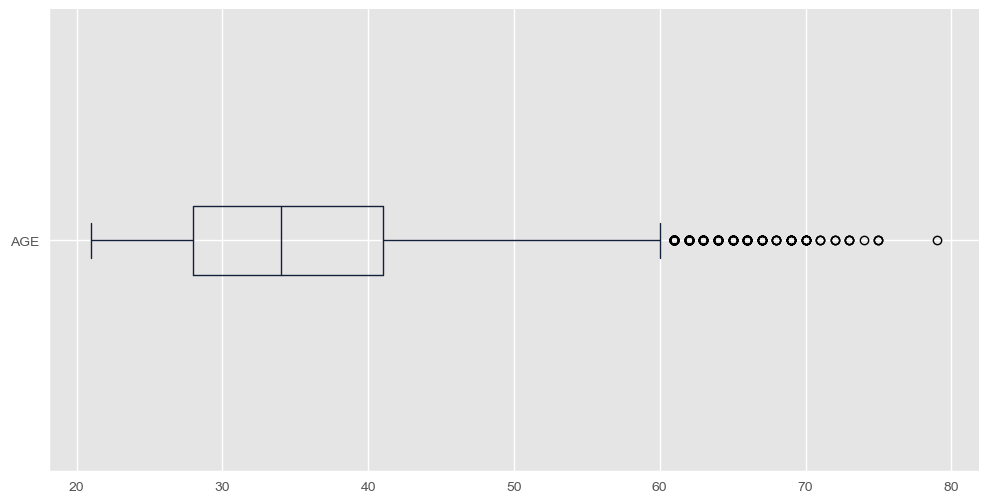

In [31]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    df.boxplot(column=['AGE'], vert=False, color='#14213d')
    ax.ticklabel_format(style='plain', axis='x')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

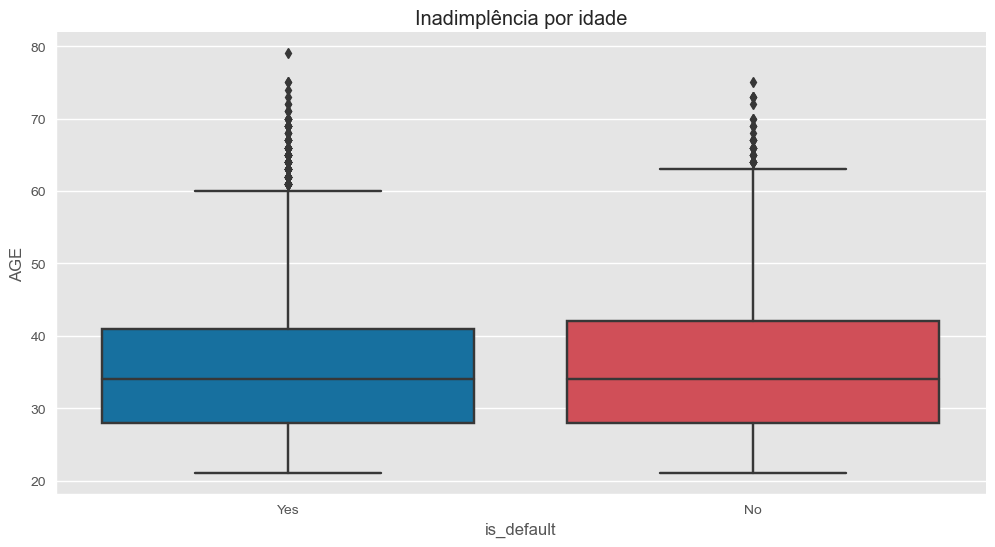

In [32]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x='is_default', y='AGE', data=df, palette={0: '#0077b6', 1: '#e63946'})
    
    ax.ticklabel_format(style='plain', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title('Inadimplência por idade')
    # Substituir os rótulos do eixo x
    ax.set_xticklabels([label_mapping_default[label] for label in df['is_default'].unique()])

plt.show()


## Correlação

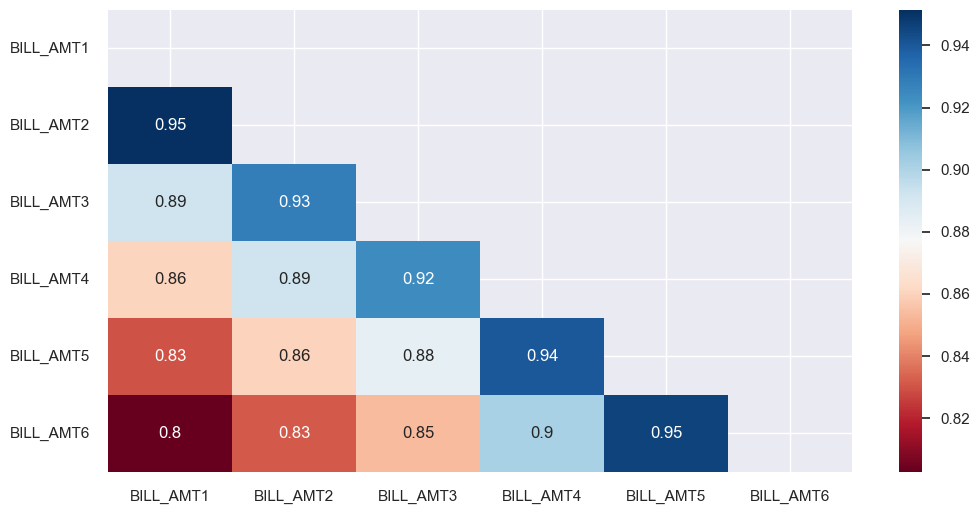

In [33]:
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

Acima temos a correlação entre o valor do extrato da fatura entre abril e setembro de 2005.
- Existe forte correlação positiva entre todas as variáveis de extrato da fatura (`BILL_AMT1` a `BILL_AMT6`), com valores de correlação acima de 0.8. Assim, o valor do extrato da fatura em um mês está fortemente associado ao valor do extrato da fatura nos meses subsequentes.
- Quando o valor do extrato da fatura aumenta ou diminui em um mês, tende a aumentar ou diminuir nos meses seguintes.
A correlação entre as variáveis diminui ao longo do tempo, sugerindo que a relação linear entre elas está enfraquecendo com o passar dos meses. Esse padrão se repete para todas as variáveis.

Checamos, agora, o  estado de pagamento entre os meses:

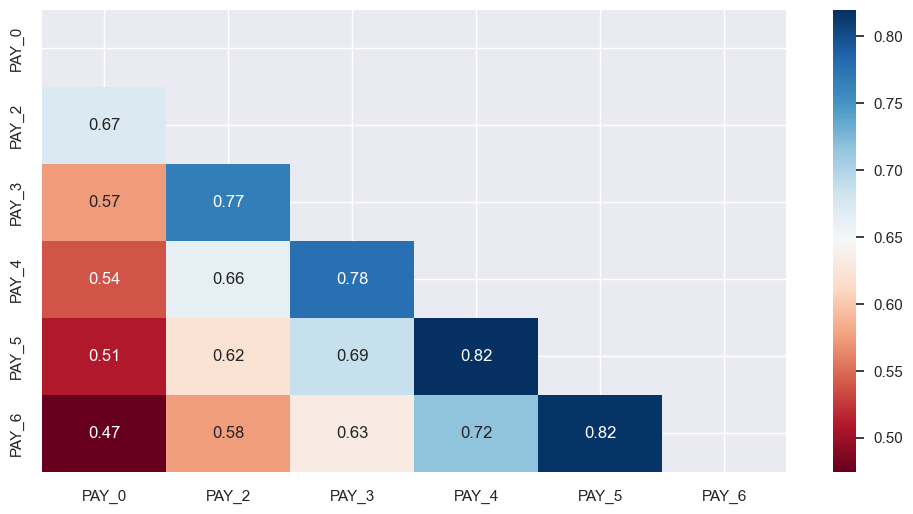

In [34]:
var = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

O padrão se repete, com a correlação diminuindo entre as variáveis conforme o passar do tempo.

Por fim, temos um gráfico de correlação entre valor do pagamento anterior:

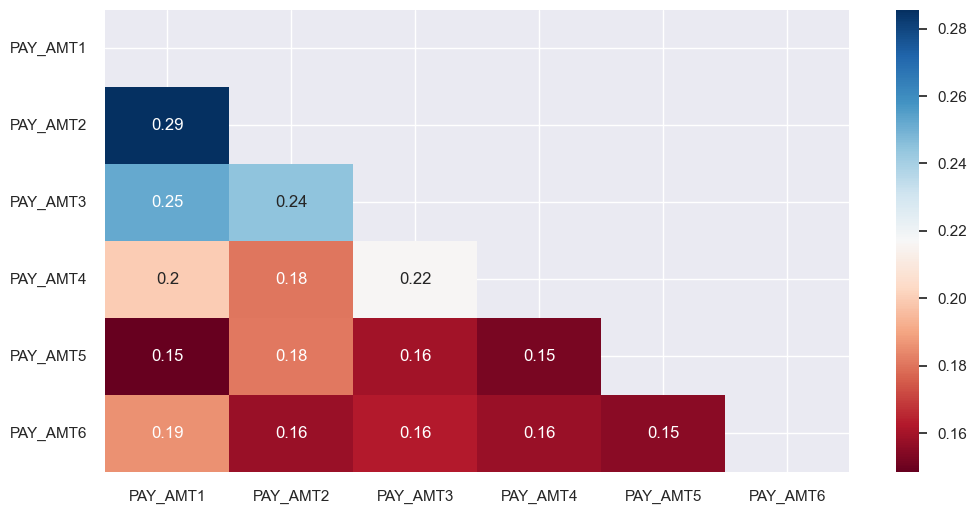

In [35]:
var = ['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
mask = np.triu(np.ones_like(df[var].corr(), dtype=bool))
sns.set(rc = {'figure.figsize':(12,6)})
sns.heatmap(df[var].corr(), mask=mask,  annot=True, cmap='RdBu')
plt.show()

- Não há correlação entre o valor pago em um mês e o seguinte.



# Preparação dos dados

Nessa seção eu irei realizar algumas transformações nos dados para prosseguir com o modelo de classificação.

Como foi visto na análise exploratória de dados, ao analisar as distribuições de colunas individuais, temos alguns valores codificados em categorias que não existem no dicionário. Esses valores são valores faltantes em potencial, que estavam rotulados como 'Unknown' ou 0. Para lidar com dados ausentes, podemos optar por descartá-los, desenvolver um modelo de aprendizado de máquina para lidar com eles ou imputá-los com a moda no caso de dados categóricos. Descartar os dados não é aconselhável devido à perda de informações em nosso conjunto de dados já pequeno, e desenvolver um modelo de aprendizado de máquina está fora do escopo do projeto. Felizmente, existe uma categoria de "Other" para todas as variáveis categórias. É nessa categoria que iremos por os dados que não sabemos o verdadeiro rótulo.

Além de imputar o valores dos dados ausentes, também detectou-se na etapa anterior outliers. Irei eliminar os valores mais discrepantes do dataset. Feito isso, irei separar a variável target do resto do dataset, separar os dados entre treino e teste, lidar com as variáveis categóricas através de one hot encoding  e normalizar os dados.
## Limpando outliers




In [36]:
df.shape

(30000, 24)

In [37]:
#outliers  de PAY_AMT
df = df[df['PAY_AMT1'] <= 750000]
df = df[df['PAY_AMT2'] <= 750000]
df = df[df['PAY_AMT3'] <= 750000]
df = df[df['PAY_AMT4'] <= 750000]
df = df[df['PAY_AMT5'] <= 750000]
df = df[df['PAY_AMT6'] <= 750000]

#outliers de LIMIT_BALL
df = df[df['LIMIT_BAL'] <= 750000]

#outliers
df = df[df['BILL_AMT1'] >= -150000]
df = df[df['BILL_AMT2'] >= -150000]
df = df[df['BILL_AMT3'] >= -150000]
df = df[df['BILL_AMT4'] >= -150000]
df = df[df['BILL_AMT5'] >= -150000]
df = df[df['BILL_AMT6'] >= -150000]

In [38]:
df.shape

(29983, 24)

## Recodificando variáveis

- `EDUCATION` é codificada como 1: 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown. Ainda assim, existem alguns 0 que não estavam no dicionário, esse valor será substituído por Other, o mesmo será feito com os valores 'Unknown'
- `MARRIAGE` é codificado como 1=casado, 2=solteiro, 3=outros, todo valor diferente desses três será classificado como Other

In [39]:
print(f'Valores de educação por categoria: \n{df["EDUCATION"].value_counts()}')
print('---' * 13)
print(f'Valores de estado civil por categoria: \n{df["MARRIAGE"].value_counts()}')

Valores de educação por categoria: 
University     14026
Graduate       10575
High School     4914
Unknown          331
Other            123
0                 14
Name: EDUCATION, dtype: int64
---------------------------------------
Valores de estado civil por categoria: 
Single     15958
Married    13649
Other        322
0             54
Name: MARRIAGE, dtype: int64


In [40]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 'Other', 'Unknown': 'Other'})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 'Other'})

In [41]:
print(f'Valores de educação por categoria corrigido: \n{df["EDUCATION"].value_counts()}')
print('---' * 17)
print(f'Valores de estado civil por categoria corrigido: \n{df["MARRIAGE"].value_counts()}')

Valores de educação por categoria corrigido: 
University     14026
Graduate       10575
High School     4914
Other            468
Name: EDUCATION, dtype: int64
---------------------------------------------------
Valores de estado civil por categoria corrigido: 
Single     15958
Married    13649
Other        376
Name: MARRIAGE, dtype: int64


## Separando a variável target

In [42]:
y_all = df.loc[:, 'is_default']
X_all = df.drop('is_default', axis = 1)

In [43]:
print(len(X_all))
print(len(y_all))
print(y_all.value_counts(normalize=True))

29983
29983
0    0.778708
1    0.221292
Name: is_default, dtype: float64


## Separando em treino e teste

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X_all,y_all, test_size=0.3, random_state=42)

## One Hot Encoding e Normalização

In [45]:
# Separando as variáveis que receberão one hot encoding
onehot_cols = ['SEX','EDUCATION', 'MARRIAGE']
non_onehot_cols = [col for col in x_train.columns if col not in onehot_cols]


steps = Pipeline([
    ('preprocess', ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), onehot_cols),
        ('normalize', MinMaxScaler(), non_onehot_cols),
    ], remainder='passthrough')),
])

# Aplicando o pipeline aos dados de treinamento
x_train_preprocessed = steps.fit_transform(x_train)
# Aplicando o pipeline aos dados de teste
x_test_preprocessed = steps.transform(x_test)

#Criando datasets com os dados transformados
## obtendo o nome das colunas
original_columns = list(steps.named_steps['preprocess'].named_transformers_['onehot'].get_feature_names_out(onehot_cols)) + non_onehot_cols

#fazendo os dataset
x_train_preprocessed_df = pd.DataFrame(x_train_preprocessed, columns=original_columns)
x_test_preprocessed_df = pd.DataFrame(x_test_preprocessed, columns = original_columns)

# Normalizing a variável target y
y_scaler = MinMaxScaler()
y_train_preprocessed = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_preprocessed = y_scaler.transform(y_test.values.reshape(-1, 1))

In [46]:
x_train_preprocessed_df.head(3)

,SEX_Male,EDUCATION_High School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Other,MARRIAGE_Single,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,0.0,0.0,0.0,0.0,1.0,0.472973,0.241379,0.1,0.2,0.2,0.1,0.222222,0.2,0.025230,0.093603,0.086504,0.107617,0.084495,0.119090,0.014814,0.005168,0.045183,0.012429,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,1.0,0.108108,0.103448,0.2,0.2,0.2,0.4,0.222222,0.2,0.078301,0.135691,0.137348,0.130197,0.094458,0.152333,0.012345,0.006221,0.000496,0.000481,0.000000,0.003794
2,1.0,0.0,0.0,1.0,0.0,1.0,0.027027,0.155172,0.1,0.2,0.2,0.2,0.222222,0.2,0.064536,0.120982,0.120757,0.123619,0.088464,0.147927,0.003950,0.002584,0.002494,0.002314,0.002345,0.001897


In [47]:
x_test_preprocessed_df.head(3)

,SEX_Male,EDUCATION_High School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Other,MARRIAGE_Single,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,0.0,0.0,1.0,0.0,1.0,0.081081,0.017241,0.2,0.2,0.2,0.2,0.222222,0.2,0.060034,0.119449,0.119146,0.121990,0.094270,0.157354,0.007452,0.002584,0.002494,0.002316,0.002792,0.001897
1,1.0,0.0,0.0,0.0,0.0,0.0,0.621622,0.327586,0.3,0.4,0.2,0.2,0.222222,0.2,0.437165,0.382097,0.352128,0.280326,0.218008,0.256389,0.012380,0.017228,0.013003,0.010414,0.011723,0.007967
2,0.0,0.0,0.0,1.0,0.0,1.0,0.162162,0.172414,0.2,0.2,0.2,0.2,0.222222,0.2,0.165477,0.205618,0.212969,0.217754,0.178835,0.252266,0.011358,0.006891,0.013218,0.008562,0.008440,0.007019


In [48]:
x_train_preprocessed


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.24291301e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.81336635e-04, 0.00000000e+00, 3.79403691e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.31411844e-03, 2.34450647e-03, 1.89701846e-03],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.47117765e-02, 3.51675970e-02, 1.89701846e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.09941453e-03, 1.75837985e-02, 6.63956460e-03],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        6.91921413e-04, 0.00000000e+00, 0.00000000e+00]])

In [49]:
y_train_preprocessed

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [50]:
y_train_preprocessed = y_train_preprocessed.reshape(-1)
y_test_preprocessed = y_test_preprocessed.reshape(-1)

In [51]:
y_train_preprocessed

array([0., 0., 0., ..., 0., 0., 0.])

In [52]:
x_test_preprocessed

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.31643256e-03, 2.79230721e-03, 1.89701846e-03],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.04135330e-02, 1.17225323e-02, 7.96747752e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.56223822e-03, 8.44022329e-03, 7.01896829e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.48788559e-03, 1.05502791e-02, 9.48509228e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.53074306e-04, 2.34450647e-03, 1.23685603e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.58688358e-04, 0.00000000e+00, 0.00000000e+00]])

# Passo a passo

## Sem balanceamento

In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score


num_folds = 5  # Você pode ajustar o número de folds conforme necessário
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

logistic_avg_precision_scores = []
logistic_roc_auc_scores = []
logistic_f1_scores = []

rf_avg_precision_scores = []
rf_roc_auc_scores = []
rf_f1_scores = []

xgb_avg_precision_scores = []
xgb_roc_auc_scores = []
xgb_f1_scores = []

for train_index, val_index in skf.split(x_train_preprocessed_df, y_train_preprocessed):
    x_train_fold, x_val_fold = x_train_preprocessed_df.iloc[train_index], x_train_preprocessed_df.iloc[val_index]
    y_train_fold, y_val_fold = y_train_preprocessed[train_index], y_train_preprocessed[val_index]

    # Treine e avalie o modelo de Regressão Logística
    logistic_model = LogisticRegression(max_iter=10000)
    logistic_model.fit(x_train_fold, y_train_fold)
    logistic_preds = logistic_model.predict(x_val_fold)
    
    logistic_avg_precision = average_precision_score(y_val_fold, logistic_preds)
    logistic_roc_auc = roc_auc_score(y_val_fold, logistic_preds)
    logistic_f1 = f1_score(y_val_fold, logistic_preds)
    
    logistic_avg_precision_scores.append(logistic_avg_precision)
    logistic_roc_auc_scores.append(logistic_roc_auc)
    logistic_f1_scores.append(logistic_f1)

    # Treine e avalie o modelo Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train_fold, y_train_fold)
    rf_preds = rf_model.predict(x_val_fold)
    
    rf_avg_precision = average_precision_score(y_val_fold, rf_preds)
    rf_roc_auc = roc_auc_score(y_val_fold, rf_preds)
    rf_f1 = f1_score(y_val_fold, rf_preds)
    
    rf_avg_precision_scores.append(rf_avg_precision)
    rf_roc_auc_scores.append(rf_roc_auc)
    rf_f1_scores.append(rf_f1)

    # Treine e avalie o modelo XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(x_train_fold, y_train_fold)
    xgb_preds = xgb_model.predict(x_val_fold)
    
    xgb_avg_precision = average_precision_score(y_val_fold, xgb_preds)
    xgb_roc_auc = roc_auc_score(y_val_fold, xgb_preds)
    xgb_f1 = f1_score(y_val_fold, xgb_preds)
    
    xgb_avg_precision_scores.append(xgb_avg_precision)
    xgb_roc_auc_scores.append(xgb_roc_auc)
    xgb_f1_scores.append(xgb_f1)

# Calcule a média das pontuações de cada métrica para cada modelo
logistic_avg_precision_mean = np.mean(logistic_avg_precision_scores)
logistic_roc_auc_mean = np.mean(logistic_roc_auc_scores)
logistic_f1_mean = np.mean(logistic_f1_scores)

rf_avg_precision_mean = np.mean(rf_avg_precision_scores)
rf_roc_auc_mean = np.mean(rf_roc_auc_scores)
rf_f1_mean = np.mean(rf_f1_scores)

xgb_avg_precision_mean = np.mean(xgb_avg_precision_scores)
xgb_roc_auc_mean = np.mean(xgb_roc_auc_scores)
xgb_f1_mean = np.mean(xgb_f1_scores)

# Exiba as médias das métricas para cada modelo
print("Média Average Precision da Regressão Logística:", logistic_avg_precision_mean)
print("Média ROC AUC da Regressão Logística:", logistic_roc_auc_mean)
print("Média F1 da Regressão Logística:", logistic_f1_mean)
print('---'* 30)
print("Média Average Precision do Random Forest:", rf_avg_precision_mean)
print("Média ROC AUC do Random Forest:", rf_roc_auc_mean)
print("Média F1 do Random Forest:", rf_f1_mean)
print('---'* 30)
print("Média Average Precision do XGBoost:", xgb_avg_precision_mean)
print("Média ROC AUC do XGBoost:", xgb_roc_auc_mean)
print("Média F1 do XGBoost:", xgb_f1_mean)

Média Average Precision da Regressão Logística: 0.3247051955254938
Média ROC AUC da Regressão Logística: 0.5934628278664646
Média F1 da Regressão Logística: 0.32638922008352395
------------------------------------------------------------------------------------------
Média Average Precision do Random Forest: 0.3746596677368981
Média ROC AUC do Random Forest: 0.652567215485856
Média F1 do Random Forest: 0.4638216176094131
------------------------------------------------------------------------------------------
Média Average Precision do XGBoost: 0.3695032201528511
Média ROC AUC do XGBoost: 0.649247407733103
Média F1 do XGBoost: 0.4571710905916156


# Balanceando os dados

In [58]:
from imblearn.over_sampling import SMOTE
# Suponha que você tenha seus dados pré-processados em x_train_preprocessed_df e y_train_preprocessed

# Crie uma instância do SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Você pode ajustar a estratégia conforme necessário

# Aplique o SMOTE aos dados de treinamento
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_preprocessed_df, y_train_preprocessed)


In [62]:
num_folds = 5  # Você pode ajustar o número de folds conforme necessário
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

logistic_avg_precision_scores = []
logistic_roc_auc_scores = []
logistic_f1_scores = []

rf_avg_precision_scores = []
rf_roc_auc_scores = []
rf_f1_scores = []

xgb_avg_precision_scores = []
xgb_roc_auc_scores = []
xgb_f1_scores = []

for train_index, val_index in skf.split(x_train_balanced, y_train_balanced):
    x_train_fold, x_val_fold = x_train_balanced.iloc[train_index], x_train_balanced.iloc[val_index]
    y_train_fold, y_val_fold = y_train_balanced[train_index], y_train_balanced[val_index]

    # Treine e avalie o modelo de Regressão Logística
    logistic_model = LogisticRegression(max_iter=10000)
    logistic_model.fit(x_train_fold, y_train_fold)
    logistic_preds = logistic_model.predict(x_val_fold)
    
    logistic_avg_precision = average_precision_score(y_val_fold, logistic_preds)
    logistic_roc_auc = roc_auc_score(y_val_fold, logistic_preds)
    logistic_f1 = f1_score(y_val_fold, logistic_preds)
    
    logistic_avg_precision_scores.append(logistic_avg_precision)
    logistic_roc_auc_scores.append(logistic_roc_auc)
    logistic_f1_scores.append(logistic_f1)

    # Treine e avalie o modelo Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(x_train_fold, y_train_fold)
    rf_preds = rf_model.predict(x_val_fold)
    
    rf_avg_precision = average_precision_score(y_val_fold, rf_preds)
    rf_roc_auc = roc_auc_score(y_val_fold, rf_preds)
    rf_f1 = f1_score(y_val_fold, rf_preds)
    
    rf_avg_precision_scores.append(rf_avg_precision)
    rf_roc_auc_scores.append(rf_roc_auc)
    rf_f1_scores.append(rf_f1)

    # Treine e avalie o modelo XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(x_train_fold, y_train_fold)
    xgb_preds = xgb_model.predict(x_val_fold)
    
    xgb_avg_precision = average_precision_score(y_val_fold, xgb_preds)
    xgb_roc_auc = roc_auc_score(y_val_fold, xgb_preds)
    xgb_f1 = f1_score(y_val_fold, xgb_preds)
    
    xgb_avg_precision_scores.append(xgb_avg_precision)
    xgb_roc_auc_scores.append(xgb_roc_auc)
    xgb_f1_scores.append(xgb_f1)

# Calcule a média das pontuações de cada métrica para cada modelo
logistic_avg_precision_mean = np.mean(logistic_avg_precision_scores)
logistic_roc_auc_mean = np.mean(logistic_roc_auc_scores)
logistic_f1_mean = np.mean(logistic_f1_scores)

rf_avg_precision_mean = np.mean(rf_avg_precision_scores)
rf_roc_auc_mean = np.mean(rf_roc_auc_scores)
rf_f1_mean = np.mean(rf_f1_scores)

xgb_avg_precision_mean = np.mean(xgb_avg_precision_scores)
xgb_roc_auc_mean = np.mean(xgb_roc_auc_scores)
xgb_f1_mean = np.mean(xgb_f1_scores)

# Exiba as médias das métricas para cada modelo
print("Média Average Precision da Regressão Logística:", logistic_avg_precision_mean)
print("Média ROC AUC da Regressão Logística:", logistic_roc_auc_mean)
print("Média F1 da Regressão Logística:", logistic_f1_mean)
print('---'* 30)
print("Média Average Precision do Random Forest:", rf_avg_precision_mean)
print("Média ROC AUC do Random Forest:", rf_roc_auc_mean)
print("Média F1 do Random Forest:", rf_f1_mean)
print('---'* 30)
print("Média Average Precision do XGBoost:", xgb_avg_precision_mean)
print("Média ROC AUC do XGBoost:", xgb_roc_auc_mean)
print("Média F1 do XGBoost:", xgb_f1_mean)

Média Average Precision da Regressão Logística: 0.6134261592428338
Média ROC AUC da Regressão Logística: 0.6691692412101218
Média F1 da Regressão Logística: 0.6680492544784988
------------------------------------------------------------------------------------------
Média Average Precision do Random Forest: 0.810894905340081
Média ROC AUC do Random Forest: 0.8551907378029361
Média F1 do Random Forest: 0.8512033768866234
------------------------------------------------------------------------------------------
Média Average Precision do XGBoost: 0.8376300760021907
Média ROC AUC do XGBoost: 0.8699291446581696
Média F1 do XGBoost: 0.8628233809219662


Comparando os modelos vemos que:

In [61]:
sem_balaceamento = {
    "Modelo": ["Regressão Logística", "Regressão Logística", "Regressão Logística", 
               "Random Forest", "Random Forest", "Random Forest", 
               "XGBoost", "XGBoost", "XGBoost"],
    "Métrica": ["Média Average Precision", "Média ROC AUC", "Média F1",
                "Média Average Precision", "Média ROC AUC", "Média F1",
                "Média Average Precision", "Média ROC AUC", "Média F1"],
    "Valor": [0.3247051955254938, 0.5934628278664646, 0.32638922008352395,
              0.37008073042605516, 0.6495992253528928, 0.45791149747607574,
              0.3695032201528511, 0.649247407733103, 0.4571710905916156]
}

sem_balaceamento = pd.DataFrame(sem_balaceamento)


In [63]:
com_balanceamento = {
    "Modelo": ["Regressão Logística", "Regressão Logística", "Regressão Logística", 
               "Random Forest", "Random Forest", "Random Forest", 
               "XGBoost", "XGBoost", "XGBoost"],
    "Métrica": ["Média Average Precision", "Média ROC AUC", "Média F1",
                "Média Average Precision", "Média ROC AUC", "Média F1",
                "Média Average Precision", "Média ROC AUC", "Média F1"],
    "Valor": [0.6134261592428338, 0.6691692412101218, 0.6680492544784988,
              0.8092125342338179, 0.8537506459831864, 0.849650963461273,
              0.8376300760021907, 0.8699291446581696, 0.8628233809219662]
}

com_balanceamento = pd.DataFrame(com_balanceamento)


In [64]:
sem_balaceamento

,Modelo,Métrica,Valor
0,Regressão Logística,Média Average Precision,0.324705
1,Regressão Logística,Média ROC AUC,0.593463
2,Regressão Logística,Média F1,0.326389
3,Random Forest,Média Average Precision,0.370081
4,Random Forest,Média ROC AUC,0.649599
5,Random Forest,Média F1,0.457911
6,XGBoost,Média Average Precision,0.369503
7,XGBoost,Média ROC AUC,0.649247
8,XGBoost,Média F1,0.457171


In [65]:
com_balanceamento

,Modelo,Métrica,Valor
0,Regressão Logística,Média Average Precision,0.613426
1,Regressão Logística,Média ROC AUC,0.669169
2,Regressão Logística,Média F1,0.668049
3,Random Forest,Média Average Precision,0.809213
4,Random Forest,Média ROC AUC,0.853751
5,Random Forest,Média F1,0.849651
6,XGBoost,Média Average Precision,0.837630
7,XGBoost,Média ROC AUC,0.869929
8,XGBoost,Média F1,0.862823


# Otimização de parâmetros

In [68]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Defina o espaço de busca para os hiperparâmetros do XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Crie o modelo XGBoost
xgb_model = XGBClassifier()

# Crie o objeto RandomizedSearchCV para otimização
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=50, scoring='roc_auc', cv=skf, verbose=1, n_jobs=-1)
random_search.fit(x_train_balanced, y_train_balanced)  # Use os dados balanceados aqui

# Obtenha os melhores hiperparâmetros
best_params = random_search.best_params_

# Obtenha o melhor modelo com os melhores hiperparâmetros
best_xgb_model = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [69]:
# Use o método get_params() para obter os parâmetros do modelo otimizado
best_xgb_params = best_xgb_model.get_params()

# Exiba os parâmetros escolhidos
print("Parâmetros otimizados do modelo XGBoost:")
print(best_xgb_params)


Parâmetros otimizados do modelo XGBoost:
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 1.0, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': 0.1, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.2, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 5, 'max_leaves': None, 'min_child_weight': 3, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [70]:
# Crie um novo modelo XGBoost com os melhores parâmetros
best_xgb_model = XGBClassifier(**best_xgb_params)
best_xgb_model.fit(x_train_balanced, y_train_balanced)  
y_pred = best_xgb_model.predict(x_test_preprocessed)  


In [71]:
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score

# Fazer previsões no conjunto de teste com o modelo XGBoost já treinado
y_pred_prob = best_xgb_model.predict_proba(x_test_preprocessed)[:, 1]

# Calcular as métricas para as previsões do modelo
xgb_avg_precision = average_precision_score(y_test, y_pred_prob)
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)
xgb_f1 = f1_score(y_test, y_pred)

print("Média Average Precision do XGBoost:", xgb_avg_precision)
print("Média ROC AUC do XGBoost:", xgb_roc_auc)
print("Média F1 do XGBoost:", xgb_f1)


Média Average Precision do XGBoost: 0.5287316416899618
Média ROC AUC do XGBoost: 0.7616202100051035
Média F1 do XGBoost: 0.48954489544895446


In [72]:
#modelo não otimizado
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, f1_score

# Criar um modelo XGBoost padrão (sem ajuste de hiperparâmetros)
xgb_model = XGBClassifier()

# Treinar o modelo no conjunto de treinamento balanceado
xgb_model.fit(x_train_balanced, y_train_balanced)

# Fazer previsões no conjunto de teste
y_pred = xgb_model.predict(x_test_preprocessed)
y_pred_prob = xgb_model.predict_proba(x_test_preprocessed)[:, 1]

# Calcular as métricas para as previsões do modelo
xgb_avg_precision = average_precision_score(y_test, y_pred_prob)
xgb_roc_auc = roc_auc_score(y_test, y_pred_prob)
xgb_f1 = f1_score(y_test, y_pred)

print("Média Average Precision do XGBoost (sem otimização):", xgb_avg_precision)
print("Média ROC AUC do XGBoost (sem otimização):", xgb_roc_auc)
print("Média F1 do XGBoost (sem otimização):", xgb_f1)


Média Average Precision do XGBoost (sem otimização): 0.5264744244134762
Média ROC AUC do XGBoost (sem otimização): 0.7587335628115057
Média F1 do XGBoost (sem otimização): 0.4863203197048877


# Feature Importance

As features importance podem ser obtidas através de um método nativo do algorítimo.Cada Árvore de Decisão é composta por nós internos e folhas. No nó interno, a característica selecionada é usada para tomar uma decisão sobre como dividir o conjunto de dados em dois conjuntos separados com respostas semelhantes. As características para os nós internos são selecionadas com base em algum critério que para regressão é a redução da variância. Podemos medir como cada característica diminui a impureza da divisão (a característica com a maior diminuição é selecionada para o nó interno). Para cada característica, podemos coletar como ela diminui a impureza em média. A média de todas as árvores no conjunto forma a medida da importância da característica. A maior vantagem desse método é a velocidade de computação. As desvantagens do método incluem a tendência a selecionar como importantes características numéricas e características categóricas com alta cardinalidade.



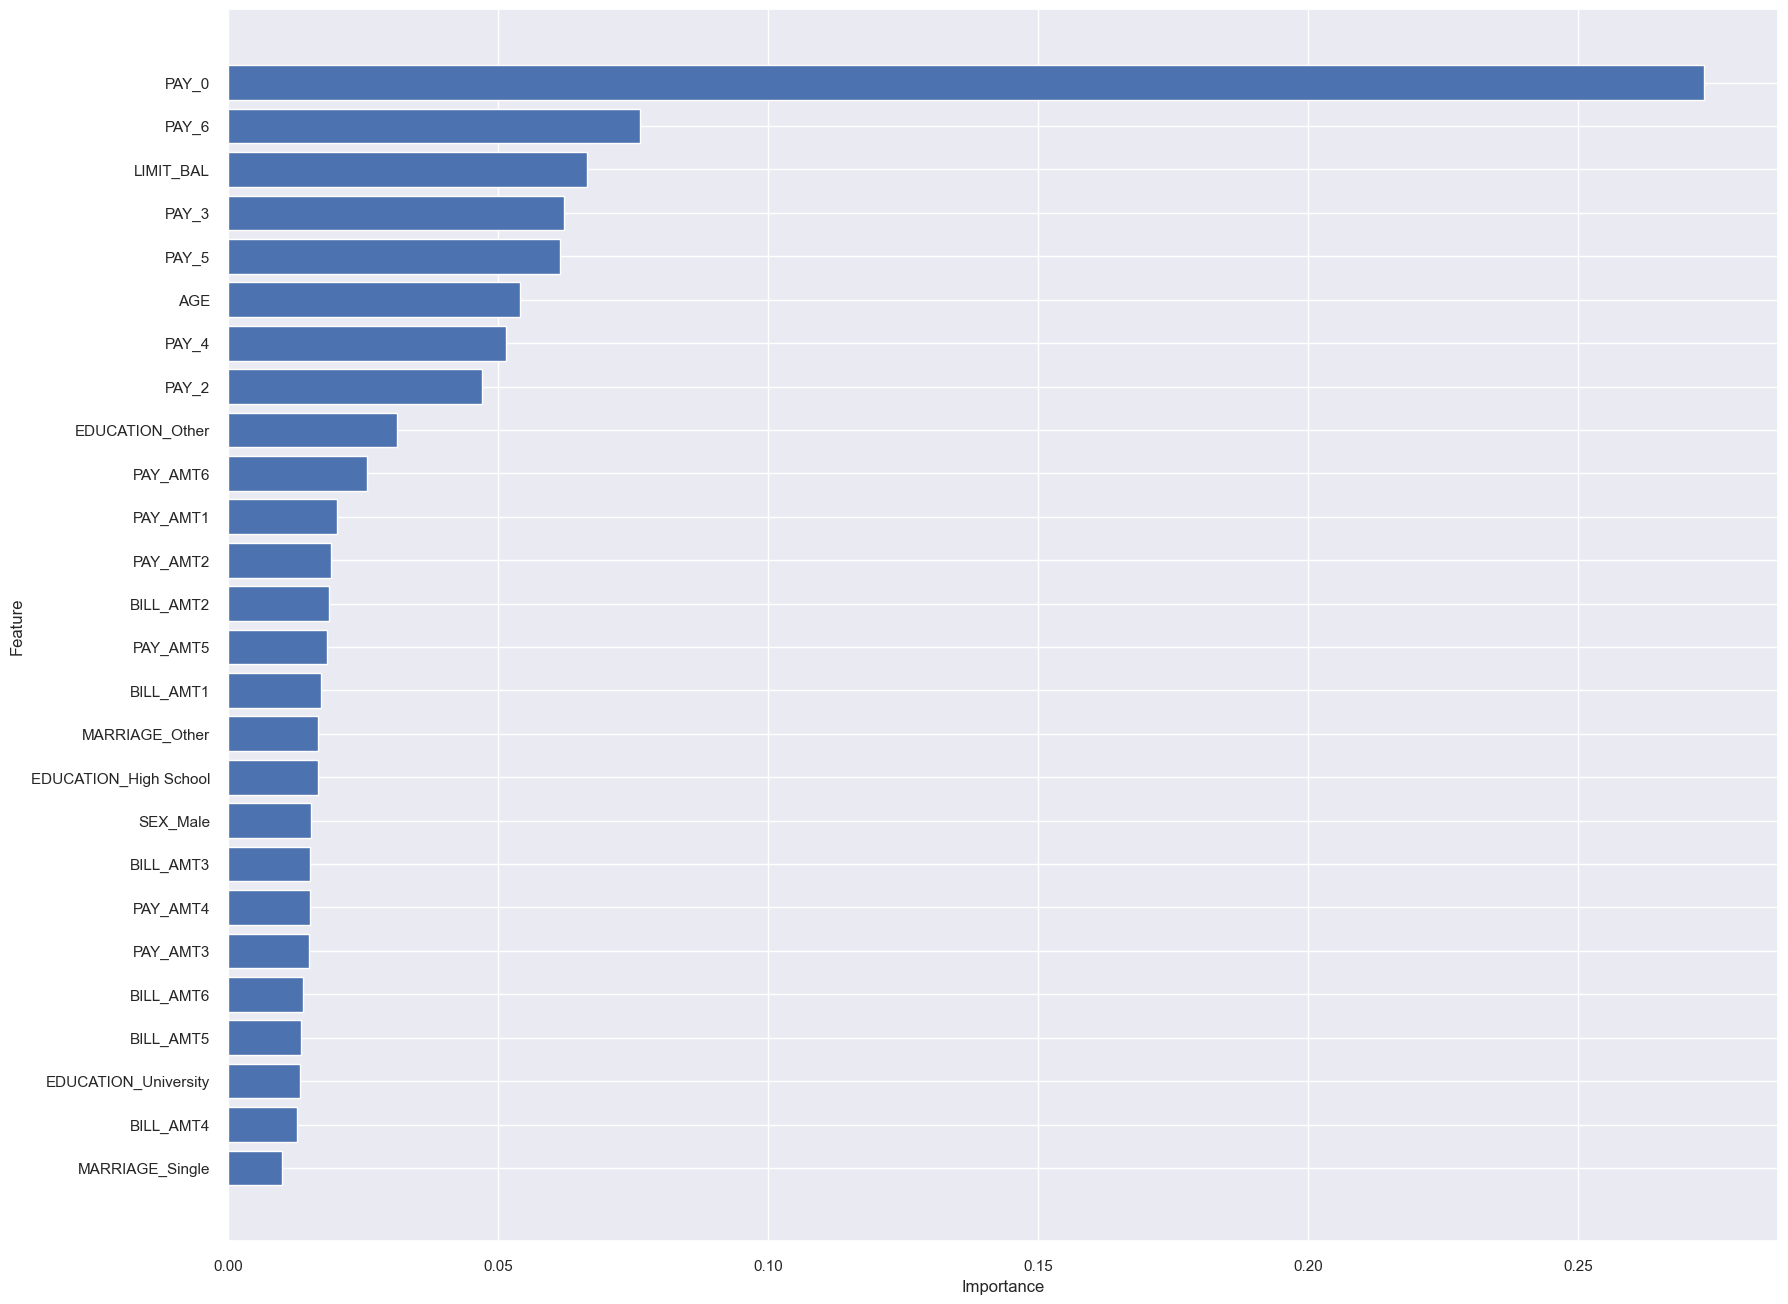

In [77]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


# Calcular as importâncias das características
importances = best_xgb_model.feature_importances_
features = x_train_preprocessed_df.columns
indices = importances.argsort()  # Classificar em ordem crescente
names = [features[i] for i in indices]

# Plotar as importâncias das características
plt.figure(figsize=(20, 16))
plt.barh(range(x_train_preprocessed_df.shape[1]), importances[indices])
plt.yticks(range(x_train_preprocessed_df.shape[1]), names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

